In [1]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
orders = pd.read_csv("orders.csv")

In [3]:
orders.info

<bound method DataFrame.info of          order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12              

In [4]:
products=pd.read_csv("products.csv")

In [5]:
products.info

<bound method DataFrame.info of        product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2   

In [6]:
#sampling orders to 100k row cause its too big 
orders = orders.sample(n=100_000, random_state=42)

orders.info

<bound method DataFrame.info of          order_id  user_id eval_set  order_number  order_dow  \
1497021   1725437    89960    prior             5          0   
2620978   1122088   157793    prior             6          3   
1973967    352443   118560    prior             1          5   
3021266   2225015   182324    prior            16          6   
1454633   1083635    87386    prior            10          1   
...           ...      ...      ...           ...        ...   
20097      184223     1242    prior            63          3   
3101138   3072189   187008    prior            30          0   
1066880    780083    64258    prior             6          3   
272625    2499112    16491    prior            28          5   
2655612   2859075   159840    prior            10          4   

         order_hour_of_day  days_since_prior_order  
1497021                 14                    14.0  
2620978                  8                     4.0  
1973967                 11              

In [7]:
# i need this dataset cause it will work like the bridge for orders and products since it has ( orders_id and products_id )

order_products = pd.read_csv("order_products__prior.csv")

order_products.info


<bound method DataFrame.info of           order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]>

In [8]:
order_products = order_products.sample(n=300_000, random_state=42)

order_products.info

<bound method DataFrame.info of           order_id  product_id  add_to_cart_order  reordered
29481110   3109255       34099                 16          0
2852353     301098       41950                  5          0
11194500   1181866       45066                  8          0
15909397   1678630        8859                  2          1
6101870     644090       24781                  2          0
...            ...         ...                ...        ...
5347538     564383       25890                  1          1
23236892   2450800       11712                  1          0
7320870     772804       24964                  9          1
30154981   3180817       33754                 15          1
27338844   2882831       43352                  6          1

[300000 rows x 4 columns]>

In [9]:
#merging orders and order_products

df_merged = orders.merge(
    order_products,
    on="order_id",
    how="left")

df_merged.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
0        1725437    89960    prior             5          0   
1        1122088   157793    prior             6          3   
2         352443   118560    prior             1          5   
3        2225015   182324    prior            16          6   
4        1083635    87386    prior            10          1   
...          ...      ...      ...           ...        ...   
100579    184223     1242    prior            63          3   
100580   3072189   187008    prior            30          0   
100581    780083    64258    prior             6          3   
100582   2499112    16491    prior            28          5   
100583   2859075   159840    prior            10          4   

        order_hour_of_day  days_since_prior_order  product_id  \
0                      14                    14.0         NaN   
1                       8                     4.0         NaN   
2               

In [10]:
df = df_merged.merge(
    products,
    on="product_id",
    how="left"
)

df.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
0        1725437    89960    prior             5          0   
1        1122088   157793    prior             6          3   
2         352443   118560    prior             1          5   
3        2225015   182324    prior            16          6   
4        1083635    87386    prior            10          1   
...          ...      ...      ...           ...        ...   
100579    184223     1242    prior            63          3   
100580   3072189   187008    prior            30          0   
100581    780083    64258    prior             6          3   
100582   2499112    16491    prior            28          5   
100583   2859075   159840    prior            10          4   

        order_hour_of_day  days_since_prior_order  product_id  \
0                      14                    14.0         NaN   
1                       8                     4.0         NaN   
2               

In [11]:
df.head(5)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1725437,89960,prior,5,0,14,14.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1122088,157793,prior,6,3,8,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,352443,118560,prior,1,5,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2225015,182324,prior,16,6,13,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1083635,87386,prior,10,1,10,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100584 entries, 0 to 100583
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                100584 non-null  int64  
 1   user_id                 100584 non-null  int64  
 2   eval_set                100584 non-null  object 
 3   order_number            100584 non-null  int64  
 4   order_dow               100584 non-null  int64  
 5   order_hour_of_day       100584 non-null  int64  
 6   days_since_prior_order  94398 non-null   float64
 7   product_id              8754 non-null    float64
 8   add_to_cart_order       8754 non-null    float64
 9   reordered               8754 non-null    float64
 10  product_name            8754 non-null    object 
 11  aisle_id                8754 non-null    float64
 12  department_id           8754 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 10.0+ MB


In [13]:

# checkin null values

df.isnull().sum()

order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order     6186
product_id                91830
add_to_cart_order         91830
reordered                 91830
product_name              91830
aisle_id                  91830
department_id             91830
dtype: int64

In [14]:
# deleting rows with no product_id, why we will do that ? cause simply this means its orders without products which makes no sense and have no value to analyze 

df['product_id'].isnull().sum()

np.int64(91830)

In [15]:
df = df.dropna(subset=['product_id'])

In [16]:
df.isnull().sum()

order_id                    0
user_id                     0
eval_set                    0
order_number                0
order_dow                   0
order_hour_of_day           0
days_since_prior_order    564
product_id                  0
add_to_cart_order           0
reordered                   0
product_name                0
aisle_id                    0
department_id               0
dtype: int64

In [17]:
df.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
36       1593172    84203    prior             9          0   
41        272157   205446    prior             3          0   
43       1806968   102990    prior             1          4   
53       1286768   123301    prior             2          4   
56       1347307    64862    prior             9          5   
...          ...      ...      ...           ...        ...   
100499    403568   155498    prior             9          4   
100525   2109566    43495    prior             6          5   
100529   1310126   116424    prior             5          0   
100535   1452880   155875    prior            37          3   
100541   2693171   140154    prior            42          6   

        order_hour_of_day  days_since_prior_order  product_id  \
36                     13                    30.0     39928.0   
41                     10                    18.0      6750.0   
43              

In [18]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
36,1593172,84203,prior,9,0,13,30.0,39928.0,11.0,0.0,Organic Kiwi,24.0,4.0
41,272157,205446,prior,3,0,10,18.0,6750.0,18.0,0.0,Cheese Ravioli with Sauce Bowls,38.0,1.0
43,1806968,102990,prior,1,4,20,NaN,28597.0,5.0,0.0,Organic Stoneground Wheat Crackers,78.0,19.0
53,1286768,123301,prior,2,4,9,13.0,5818.0,8.0,0.0,White Onion,83.0,4.0
56,1347307,64862,prior,9,5,15,4.0,34565.0,9.0,1.0,Peanut Butter Whole Grain Clusters,57.0,14.0


In [19]:
# now its turn to take care of days since prior orders nan, days_since_prior_order still have  564 NaN, ودول في الاغلب ايام اول اوردر فمفيش ايام قبلهم اصلا لاوردرات تانية وعشان كده الافضل اننا نملاهم بصفر بدل منشيلهم خالص

df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)

df.isnull().sum()

# by now we finished both nan and missing values, next step is to Apply encoding for categorical variables

C:\Users\doc\AppData\Local\Temp\ipykernel_20364\2070034012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)


order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
dtype: int64

In [20]:
df.head()

df.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
36       1593172    84203    prior             9          0   
41        272157   205446    prior             3          0   
43       1806968   102990    prior             1          4   
53       1286768   123301    prior             2          4   
56       1347307    64862    prior             9          5   
...          ...      ...      ...           ...        ...   
100499    403568   155498    prior             9          4   
100525   2109566    43495    prior             6          5   
100529   1310126   116424    prior             5          0   
100535   1452880   155875    prior            37          3   
100541   2693171   140154    prior            42          6   

        order_hour_of_day  days_since_prior_order  product_id  \
36                     13                    30.0     39928.0   
41                     10                    18.0      6750.0   
43              

In [21]:
# categorical columun is ( product name ), we use label encoding since product name has so many cariables and one hot encoding would create many rows 

from sklearn.preprocessing import LabelEncoder
em = LabelEncoder()
df['product_name_encoded'] = em.fit_transform(df['product_name'])



C:\Users\doc\AppData\Local\Temp\ipykernel_20364\420078092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_name_encoded'] = em.fit_transform(df['product_name'])


In [22]:
df.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
36       1593172    84203    prior             9          0   
41        272157   205446    prior             3          0   
43       1806968   102990    prior             1          4   
53       1286768   123301    prior             2          4   
56       1347307    64862    prior             9          5   
...          ...      ...      ...           ...        ...   
100499    403568   155498    prior             9          4   
100525   2109566    43495    prior             6          5   
100529   1310126   116424    prior             5          0   
100535   1452880   155875    prior            37          3   
100541   2693171   140154    prior            42          6   

        order_hour_of_day  days_since_prior_order  product_id  \
36                     13                    30.0     39928.0   
41                     10                    18.0      6750.0   
43              

In [23]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,product_name_encoded
36,1593172,84203,prior,9,0,13,30.0,39928.0,11.0,0.0,Organic Kiwi,24.0,4.0,2502
41,272157,205446,prior,3,0,10,18.0,6750.0,18.0,0.0,Cheese Ravioli with Sauce Bowls,38.0,1.0,542
43,1806968,102990,prior,1,4,20,0.0,28597.0,5.0,0.0,Organic Stoneground Wheat Crackers,78.0,19.0,2766
53,1286768,123301,prior,2,4,9,13.0,5818.0,8.0,0.0,White Onion,83.0,4.0,4125
56,1347307,64862,prior,9,5,15,4.0,34565.0,9.0,1.0,Peanut Butter Whole Grain Clusters,57.0,14.0,3062


In [24]:
#now we do one hot encoding for aisle_id and dpartment_id, وده لان ارقامهم مش ارقام تفضيلية او ترتيب معين هي بس ارقام بتدل علي مكان منتج ما 

df = pd.get_dummies(
    df,
    columns=['aisle_id', 'department_id'],
    drop_first=True
)

In [25]:
df.shape

df.info

<bound method DataFrame.info of         order_id  user_id eval_set  order_number  order_dow  \
36       1593172    84203    prior             9          0   
41        272157   205446    prior             3          0   
43       1806968   102990    prior             1          4   
53       1286768   123301    prior             2          4   
56       1347307    64862    prior             9          5   
...          ...      ...      ...           ...        ...   
100499    403568   155498    prior             9          4   
100525   2109566    43495    prior             6          5   
100529   1310126   116424    prior             5          0   
100535   1452880   155875    prior            37          3   
100541   2693171   140154    prior            42          6   

        order_hour_of_day  days_since_prior_order  product_id  \
36                     13                    30.0     39928.0   
41                     10                    18.0      6750.0   
43              

In [26]:
#scaling turn, why we do scaling? its for better visuals later on when we draw the data 

#i pick two random numerical columuns to do scaling for

x = ['order_number', 'days_since_prior_order']
scaler = StandardScaler()

df[x] = scaler.fit_transform(df[x])

In [27]:
#scale check

df[x].describe()

,order_number,days_since_prior_order
count,8.754000e+03,8.754000e+03
mean,-4.870067e-18,8.116778e-18
std,1.000057e+00,1.000057e+00
min,-9.121801e-01,-1.153821e+00
25%,-6.882268e-01,-7.064585e-01
50%,-3.522967e-01,-3.709367e-01
75%,3.755517e-01,4.119475e-01
max,4.574677e+00,2.201397e+00


In [28]:
#feature engineering turn, but first we should clearify why people do feature engineering in first place?, well feature engineering is what gives data meaning, it takes row data and makes it meaningful

# for example the data we have here, we cant really tell the customer behavior through these numbers, so our mission is to do feature engineering 

# things we can get with feature enginering ( products per order, orders done in the morning, and the reorder rate for a customer)

df['products_per_order'] = df.groupby('order_id')['product_id'].transform('count')

In [29]:
df['is_it_morning'] = (df['order_hour_of_day'] < 12).astype(int)

In [30]:
df['user_reorder_rate'] = df.groupby('user_id')['reordered'].transform('mean')

In [31]:
# we can also do somethign maybe like orders done in the weekends 

df['is_it_weekend'] = df['order_dow'].isin([0, 6]).astype(int)

In [32]:
df[["products_per_order", "is_it_morning", "is_it_weekend", "user_reorder_rate"]].head()

,products_per_order,is_it_morning,is_it_weekend,user_reorder_rate
36,1,0,1,0.0
41,1,1,1,0.0
43,1,0,0,0.0
53,1,1,0,0.0
56,1,0,0,1.0


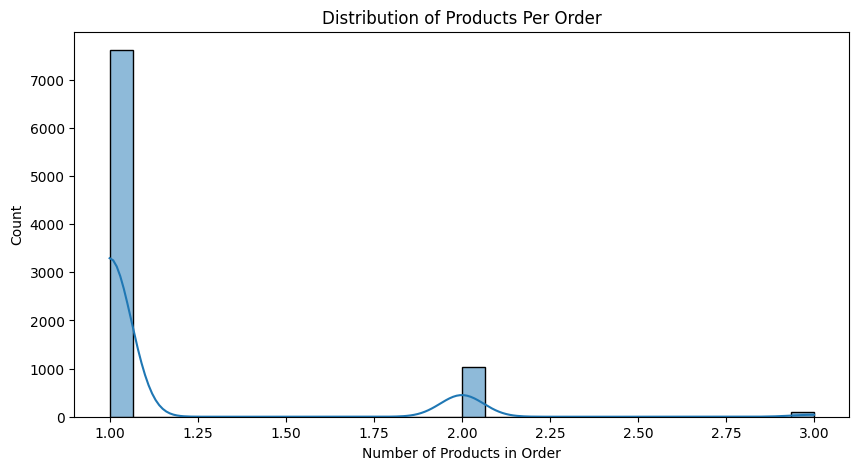

In [33]:
#Univariate Analysis ( to understand the feature of every columun and get outliers out if there's any)

# first we do univariate analysis for products_per_orde

plt.figure(figsize=(10,5))
sns.histplot(df['products_per_order'], bins=30, kde=True)
plt.title("Distribution of Products Per Order")
plt.xlabel("Number of Products in Order")
plt.ylabel("Count")
plt.show()

# no outliers been deteced

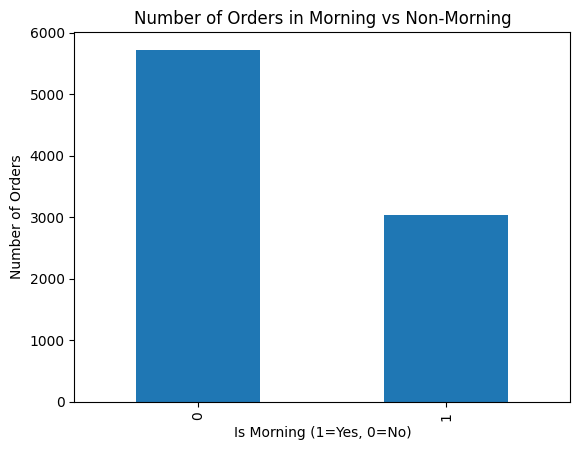

In [34]:
# is_it_morning univariate analysis

df['is_it_morning'].value_counts().plot(kind='bar')
plt.title("Number of Orders in Morning vs Non-Morning")
plt.xlabel("Is Morning (1=Yes, 0=No)")
plt.ylabel("Number of Orders")
plt.show()

# this clearly shows that most orders have been made at night 

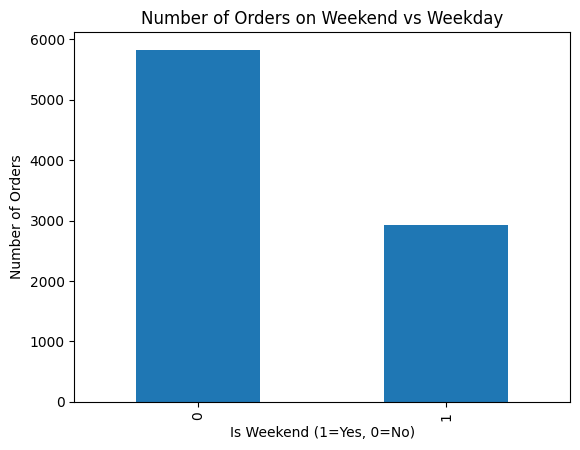

In [35]:
# is_it_weekend univariate analysis 

df['is_it_weekend'].value_counts().plot(kind='bar')
plt.title("Number of Orders on Weekend vs Weekday")
plt.xlabel("Is Weekend (1=Yes, 0=No)")
plt.ylabel("Number of Orders")
plt.show()

#this shows that most orders been made at the weekdays

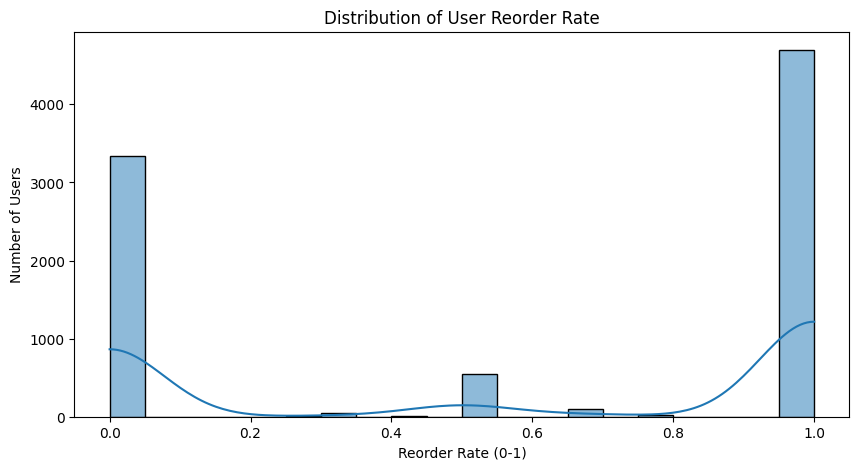

In [36]:
#user_reorder_rate univariate analysis ( to understand the cumstomer's behiavor )

plt.figure(figsize=(10,5))
sns.histplot(df['user_reorder_rate'], bins=20, kde=True)
plt.title("Distribution of User Reorder Rate")
plt.xlabel("Reorder Rate (0-1)")
plt.ylabel("Number of Users")
plt.show()

#this shows that a good amount of customers lean into reodering the products which means they like it

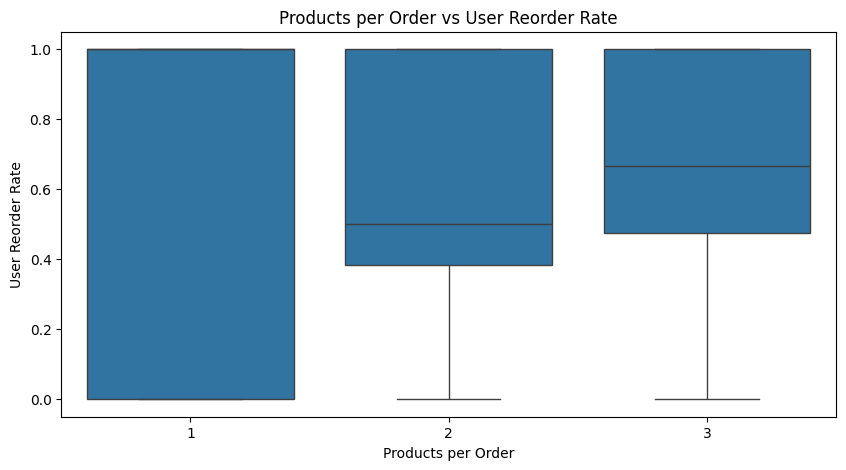

In [37]:
# Bivariate Analysis, our goal is to detect the customer behvaior and see what makes his reoder rate goes higher

# and thats why our main focus will be on ( products_per_order, is_it_morning, is_it_weekend, user_reorder_rate)

#first relation ( user_reorder_rate, products_per_order  )

plt.figure(figsize=(10,5))
sns.boxplot(
    x='products_per_order',
    y='user_reorder_rate',
    data=df
)
plt.title("Products per Order vs User Reorder Rate")
plt.xlabel("Products per Order")
plt.ylabel("User Reorder Rate")
plt.show()

#the figure shows that even tho if theres a relation between the order size and user reoder date, its still not that big of relation that can be considered as a decider for the customer behavior 


C:\Users\doc\AppData\Local\Temp\ipykernel_20364\903165544.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


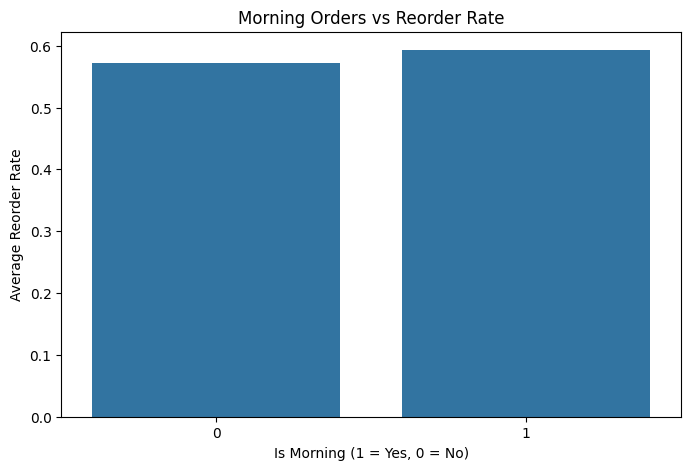

In [38]:
# next relation between ( is_it_morning, user_reorder_rate )

plt.figure(figsize=(8,5))
sns.barplot(
    x='is_it_morning',
    y='user_reorder_rate',
    data=df,
    ci=None
    
)
plt.title("Morning Orders vs Reorder Rate")
plt.xlabel("Is Morning (1 = Yes, 0 = No)")
plt.ylabel("Average Reorder Rate")
plt.show()

# again, morning orders do not show a significant difference in reorder behavior compared to non-morning orders

C:\Users\doc\AppData\Local\Temp\ipykernel_20364\3935062540.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


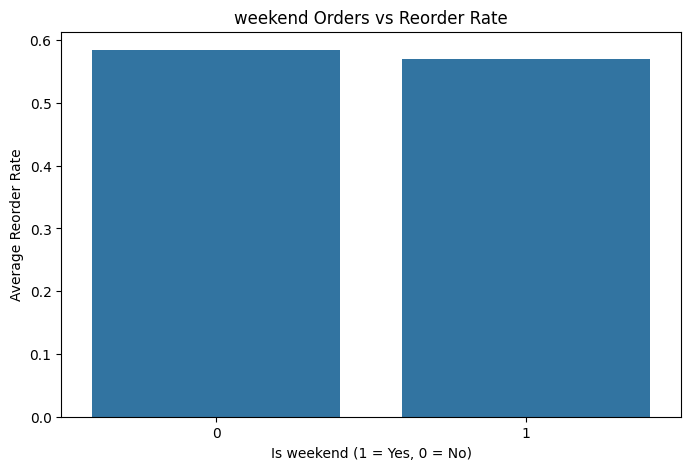

In [39]:
# next relation between ( is_it_weekend, user_reorder_rate )

plt.figure(figsize=(8,5))
sns.barplot(
    x='is_it_weekend',
    y='user_reorder_rate',
    data=df,
    ci=None
    
)
plt.title("weekend Orders vs Reorder Rate")
plt.xlabel("Is weekend (1 = Yes, 0 = No)")
plt.ylabel("Average Reorder Rate")
plt.show()

# final conclusion: Bivariate analysis shows that neither order size nor ordering time has a strong individual impact on user reorder behavior

In [40]:
df.to_csv("final_dataset.csv", index=False)


In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


st.title("Instacart Orders Analysis")


@st.cache_data
def load_data():
    df = pd.read_csv("final_dataset.csv")  
    return df

df = load_data()
# univariate analysis
st.subheader("Sample of the Dataset")
st.dataframe(df.head())

st.subheader("Univariate Analysis")
column = st.selectbox(
    "Choose a column:",
    ['products_per_order', 'user_reorder_rate', 'is_it_morning', 'is_it_weekend']
)


fig, ax = plt.subplots()
sns.histplot(df[column], bins=30, kde=True, ax=ax)
ax.set_title(f"Distribution of {column}")
st.pyplot(fig)

st.subheader("Bivariate Analysis")

x_col = st.selectbox("Choose X (categorical)", ['is_it_weekend', 'is_it_morning', 'products_per_order'])
y_col = st.selectbox("Choose Y (numerical)", ['user_reorder_rate'])

fig2, ax2 = plt.subplots()
sns.boxplot(x=x_col, y=y_col, data=df, ax=ax2)
ax2.set_title(f"{x_col} vs {y_col}")
st.pyplot(fig2)




Overwriting app.py
